## Using Systems to Construct Representations

In [3]:
from wav_table import *
from freq_table import *

In [2]:
# use the Wav_Signal class to instantiate an object with a sampling rate of 44100, 440Hz and 1 second in duration
A_4 = Wav_Signal(44100,
                 pitch_to_frequency.get('A')[4],
                 1.0)

In [3]:
# construct a sine tone as a wav file
A_4.make_simple_wav('sine')

In [4]:
ls wav_files/

simple_440.0_sin.wav*


In [5]:
# use the Hz class to instantiate an object of 440Hz
A4 = Hz(pitch_to_frequency.get('A')[4])

In [8]:
# construct semitone system from 440Hz
A4_semitone_system = A4.make_system(system_type=interval_systems.get('semi_tones'), 
                                    system_size=range(0,13)
)

In [11]:
# construct a sine tone as a wav file for each frequency in the semitone system
for freq, hz in A4_semitone_system.items():
    Wav_Signal(44100, hz, 1.0).make_simple_wav('sine')

In [12]:
ls wav_files/

simple_440.0_sin.wav*  simple_587.33_sin.wav* simple_783.99_sin.wav*
simple_466.16_sin.wav* simple_622.25_sin.wav* simple_830.61_sin.wav*
simple_493.88_sin.wav* simple_659.26_sin.wav* simple_880.0_sin.wav*
simple_523.25_sin.wav* simple_698.46_sin.wav*
simple_554.37_sin.wav* simple_739.99_sin.wav*


In [13]:
# construct quartertone system from 440Hz
A4_quartertone_system = A4.make_system(system_type=interval_systems.get('quarter_tones'),
                                       system_size=range(0,25)
)

In [15]:
# construct a sine tone as a wav file for each frequency in the quartertone system
for freq, hz in A4_quartertone_system.items():
    Wav_Signal(44100, hz, 1.0).make_simple_wav('sine')

In [16]:
ls wav_files/

simple_440.0_sin.wav*  simple_570.61_sin.wav* simple_739.99_sin.wav*
simple_452.89_sin.wav* simple_587.33_sin.wav* simple_761.67_sin.wav*
simple_466.16_sin.wav* simple_604.54_sin.wav* simple_783.99_sin.wav*
simple_479.82_sin.wav* simple_622.25_sin.wav* simple_806.96_sin.wav*
simple_493.88_sin.wav* simple_640.49_sin.wav* simple_830.61_sin.wav*
simple_508.36_sin.wav* simple_659.26_sin.wav* simple_854.95_sin.wav*
simple_523.25_sin.wav* simple_678.57_sin.wav* simple_880.0_sin.wav*
simple_538.58_sin.wav* simple_698.46_sin.wav*
simple_554.37_sin.wav* simple_718.92_sin.wav*


## Analyze the Representations

In [1]:
# first tone in the semitone system (440Hz)
wav_1 = 'wav_files/simple_440.0_sin.wav'
# second tone in the quartertone system (452.89Hz)
wav_2 = 'wav_files/simple_452.89_sin.wav'

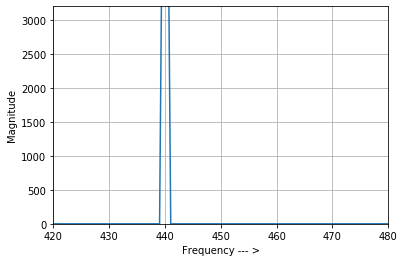

In [8]:
# use the fast fourier transform to inspect the wav_1 file and verify that the tone is sounding at 440Hz
fft_plot(wav_1, xlimit=(420,480), ylimit=(0,3200))

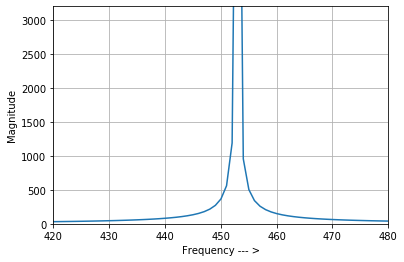

In [5]:
# use the fast fourier transform to inspect the wav_2 file and verify that the tone is sounding at 452.89Hz
fft_plot(wav_2, xlimit=(420,480), ylimit=(0,3200))

In [6]:
# stack the frequencies together into one wav file
waves = [wav_1, wav_2]
stack_wav(waves, 'stacked_440.0_452.89_sine.wav')

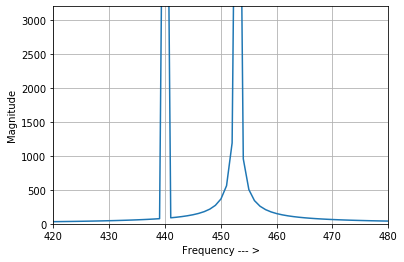

In [7]:
# inspect wav_3 file and verify that the sounding tone is a combination of both pitches from wav_1 and wav_2
wav_3 = 'wav_files/stacked_440.0_452.89_sine.wav'
fft_plot(wav_3, xlimit=(420,480), ylimit=(0,3200))

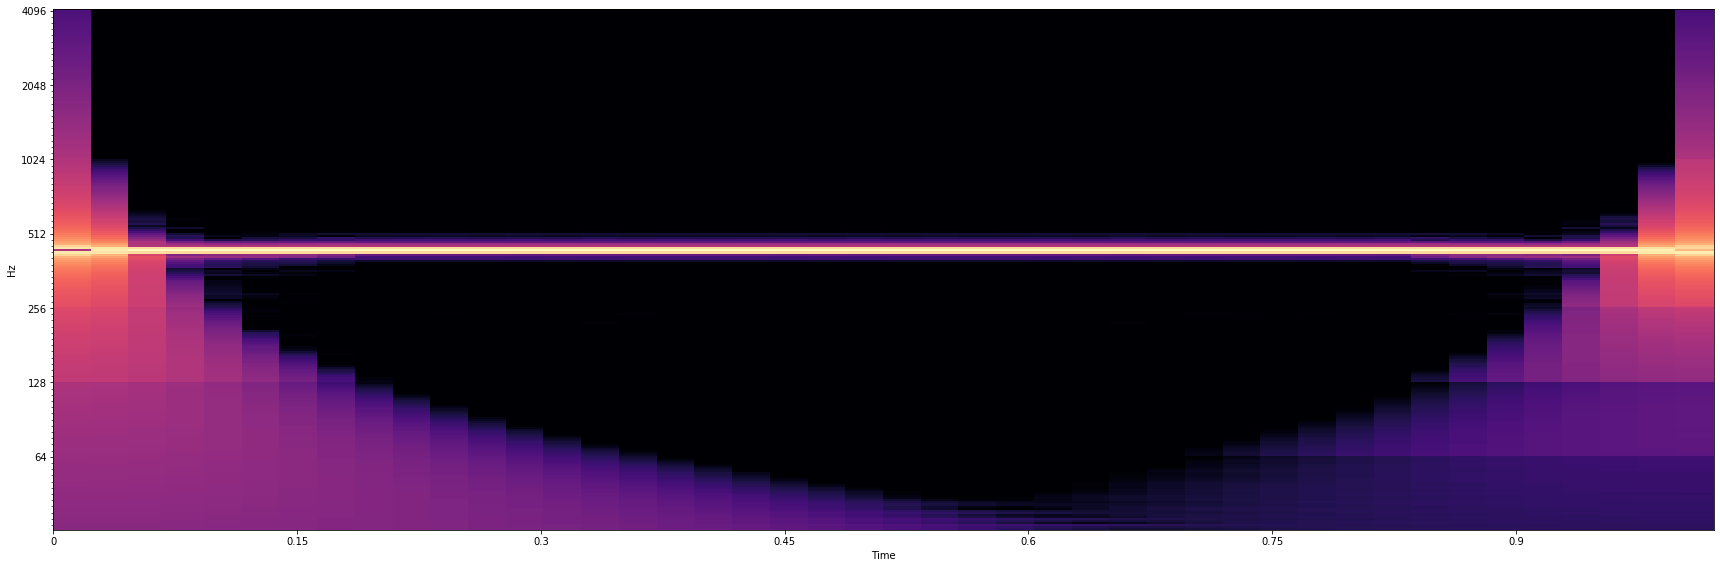

In [27]:
# plot the constructed sine tone from wav_1
show_signal(wav_1)

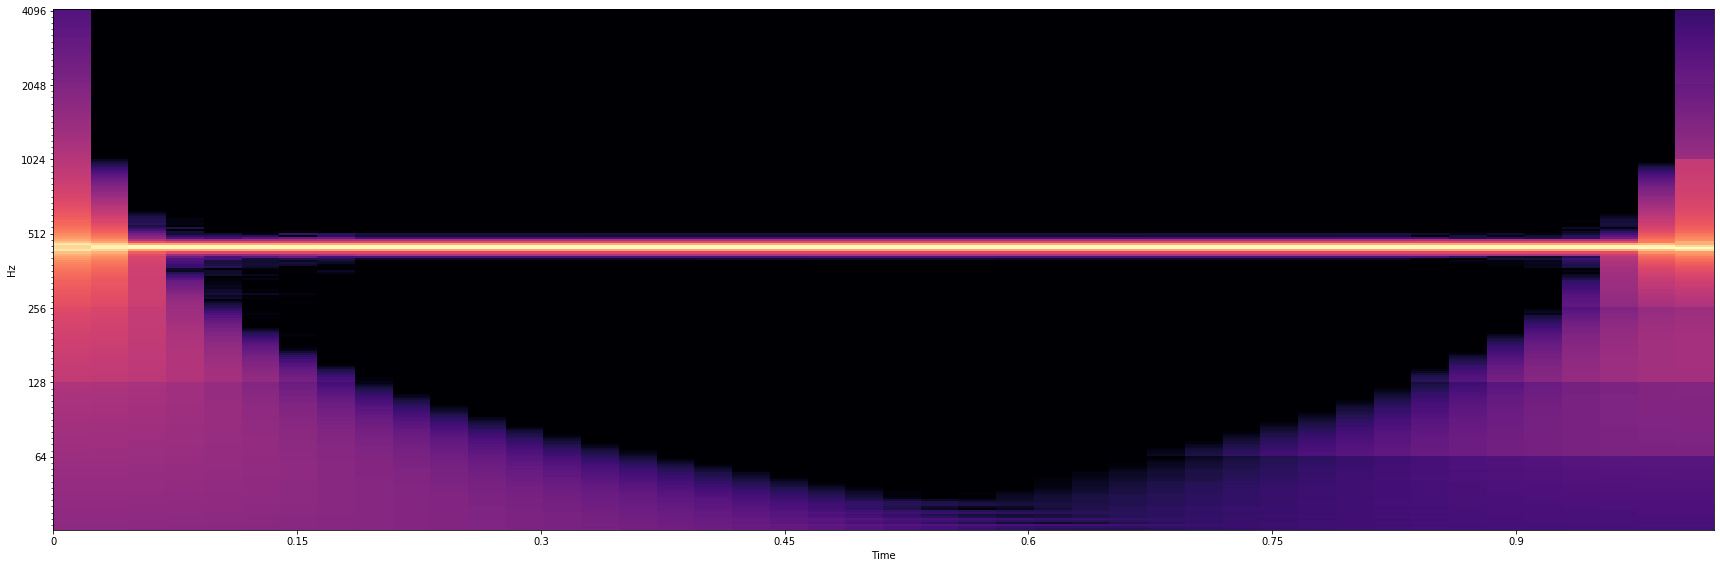

In [28]:
# plot the constructed sine tone from wav_2
show_signal(wav_2)

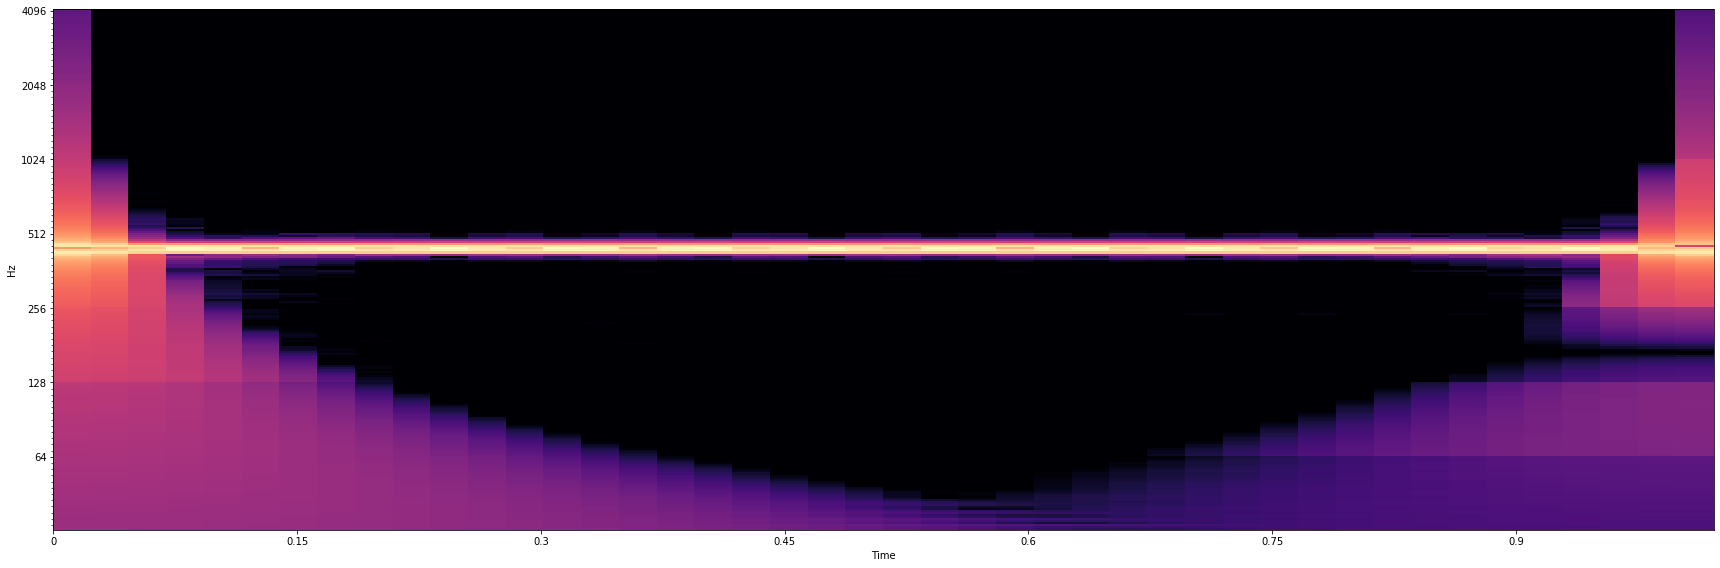

In [29]:
# plot the constructed sine tone from wav_3
show_signal(wav_3)

In the spectrographs, we can see that each tone is existing in a digital vacuum. The file is a digital rendering of the tone(s) by themself and not existing in relation to any other frequencies

## Detect Pitch in Representation

In [18]:
# analyze the pitch of wav_1 
closest_pitch(detech_pitch(wav_1))

-0.5 0.499975
439.89750000000004


'A4'

We can see that there is a very subtle error in detection, as we know the tone is is 440Hz; but it comes extremely close and renders the accurate pitch name

In [26]:
# analyze file from wav_file directory
closest_pitch(detech_pitch('wav_files/simple_466.16_sin.wav'))

-0.5 0.499975
466.3575000000001


'A#4'

In [25]:
# the exact frequency of A#4
pitch_to_frequency.get('A#')[4]

466.16

Here we can see the amount of error is very little.

## Analyzing Sample Rate and Bit Depth

In [39]:
import wave

In [40]:
wav_5 = wave.open('wav_files/simple_466.16_sin.wav')

In [43]:
#assign
bytes_per_second = wav_5.getsampwidth() 
sample_rate =  wav_5.getframerate()
print('sampling rate of file: ' + str(sample_rate) + ' Hz')
channels = wav_5.getnchannels()
#calculate
bit_rate = sample_rate * bytes_per_second * 8 * channels
bitdepth = bit_rate // sample_rate
print('bit depth of file: ' + str(bitdepth) + ' bits')

sampling rate of file: 44100 Hz
bit depth of file: 16 bits


With this notebook, we started with a number and concluded with a ocatve of 48 microtonal tones rendered as wav files. We then visualized the frequencies using fast fourier transform as well as a spectrograph. Additionally we inspected the construction of the file by analyzing the sample rate and bit depth.

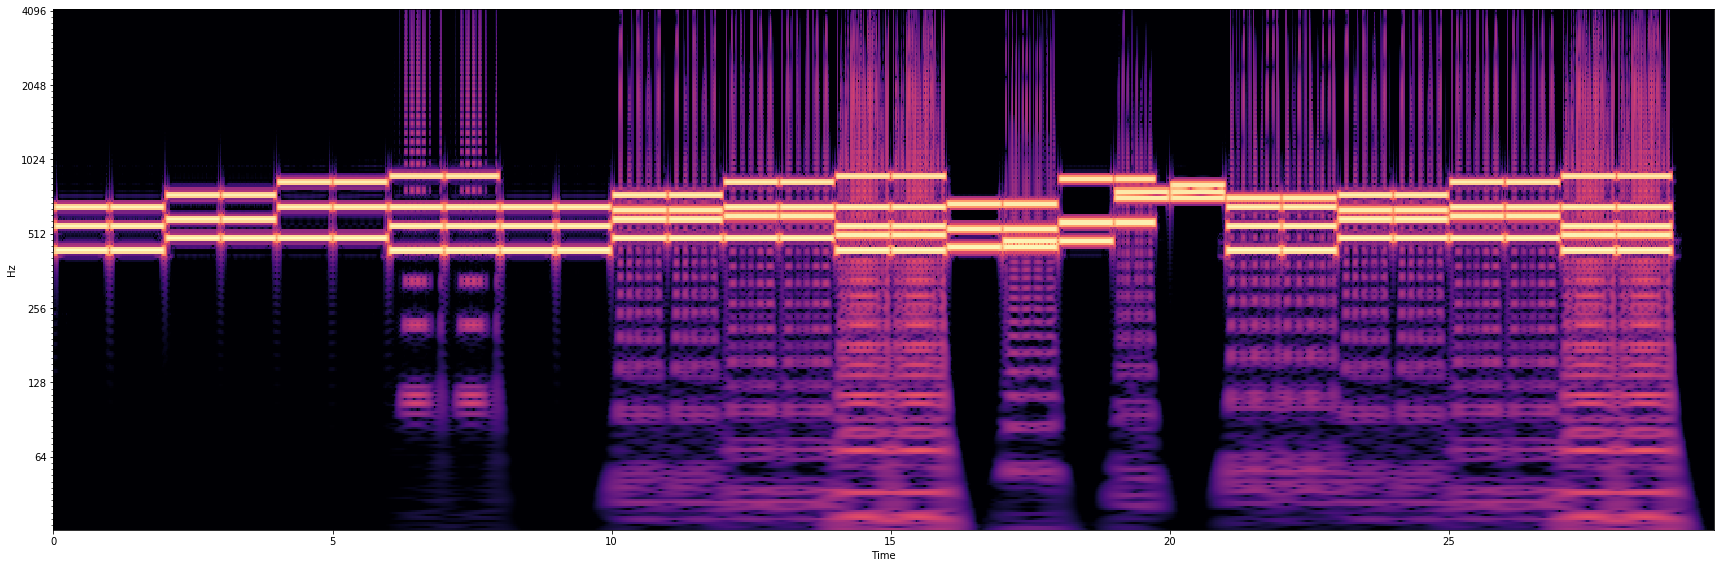

In [45]:
show_signal('/Volumes/S200408/backup/S190813/Coding/wav_utilities/constructed_tones/Bounces/constructed_progression.wav')

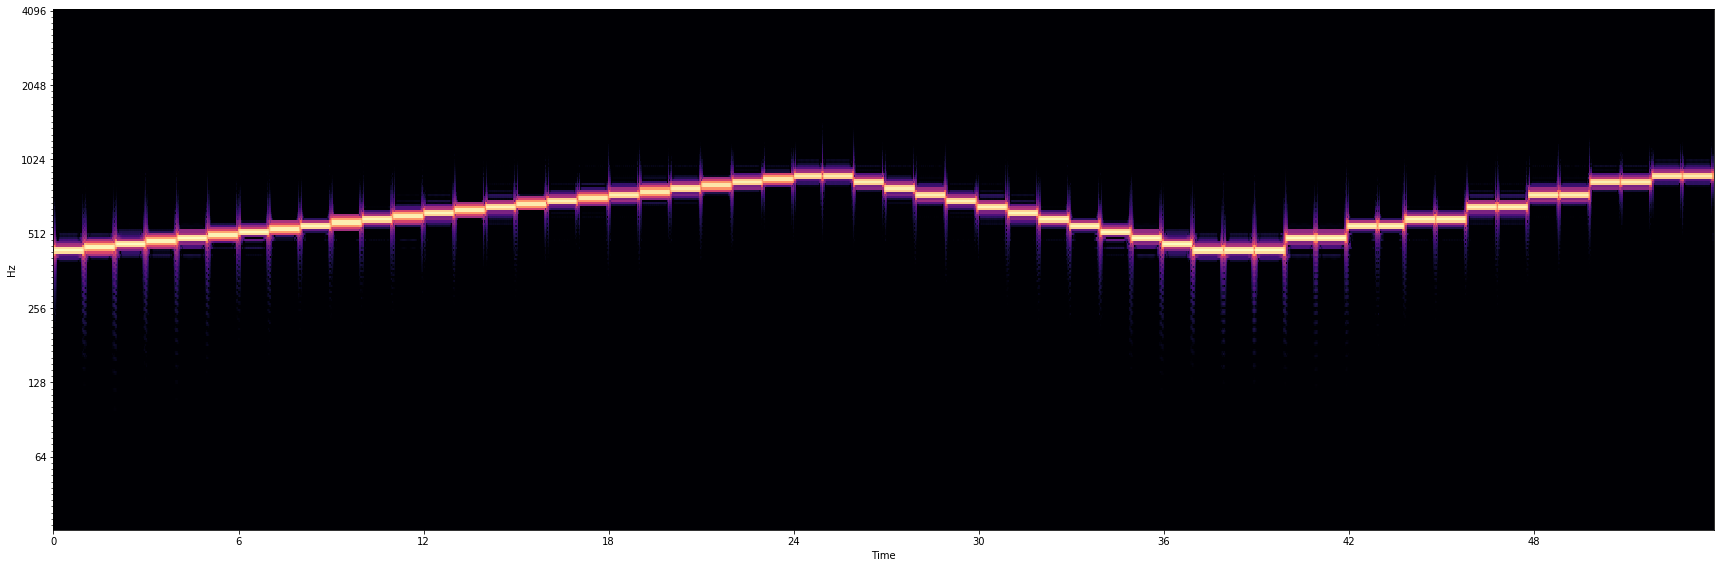

In [46]:
show_signal('/Volumes/S200408/backup/S190813/Coding/wav_utilities/constructed_tones/Bounces/constructed_scales_u_d.wav')